In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,PowerTransformer,StandardScaler,power_transform
from sklearn. preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

import joblib
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#importing dataset from GitHub to jupyter notebook

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/master/baseball.csv")

In [ ]:
#loading into dataframe

In [3]:
df=pd.DataFrame(data=df)
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [4]:
df.shape

(30, 17)

In [5]:
df.dtypes 

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [69]:
#checking null values via heatmap and isnull

In [6]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

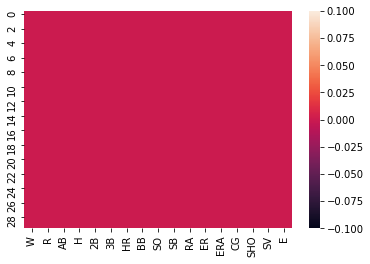

In [7]:
sn.heatmap(df.isnull()) 

In [8]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


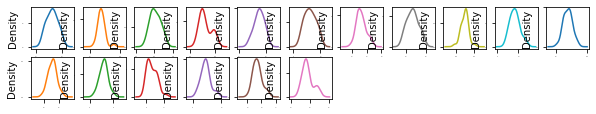

In [9]:
df.plot(kind="density",subplots=True,layout=(11,11),sharex=False,legend =False,fontsize=1,figsize=(10,10))
plt.show()


In [ ]:
#only very few are skewed

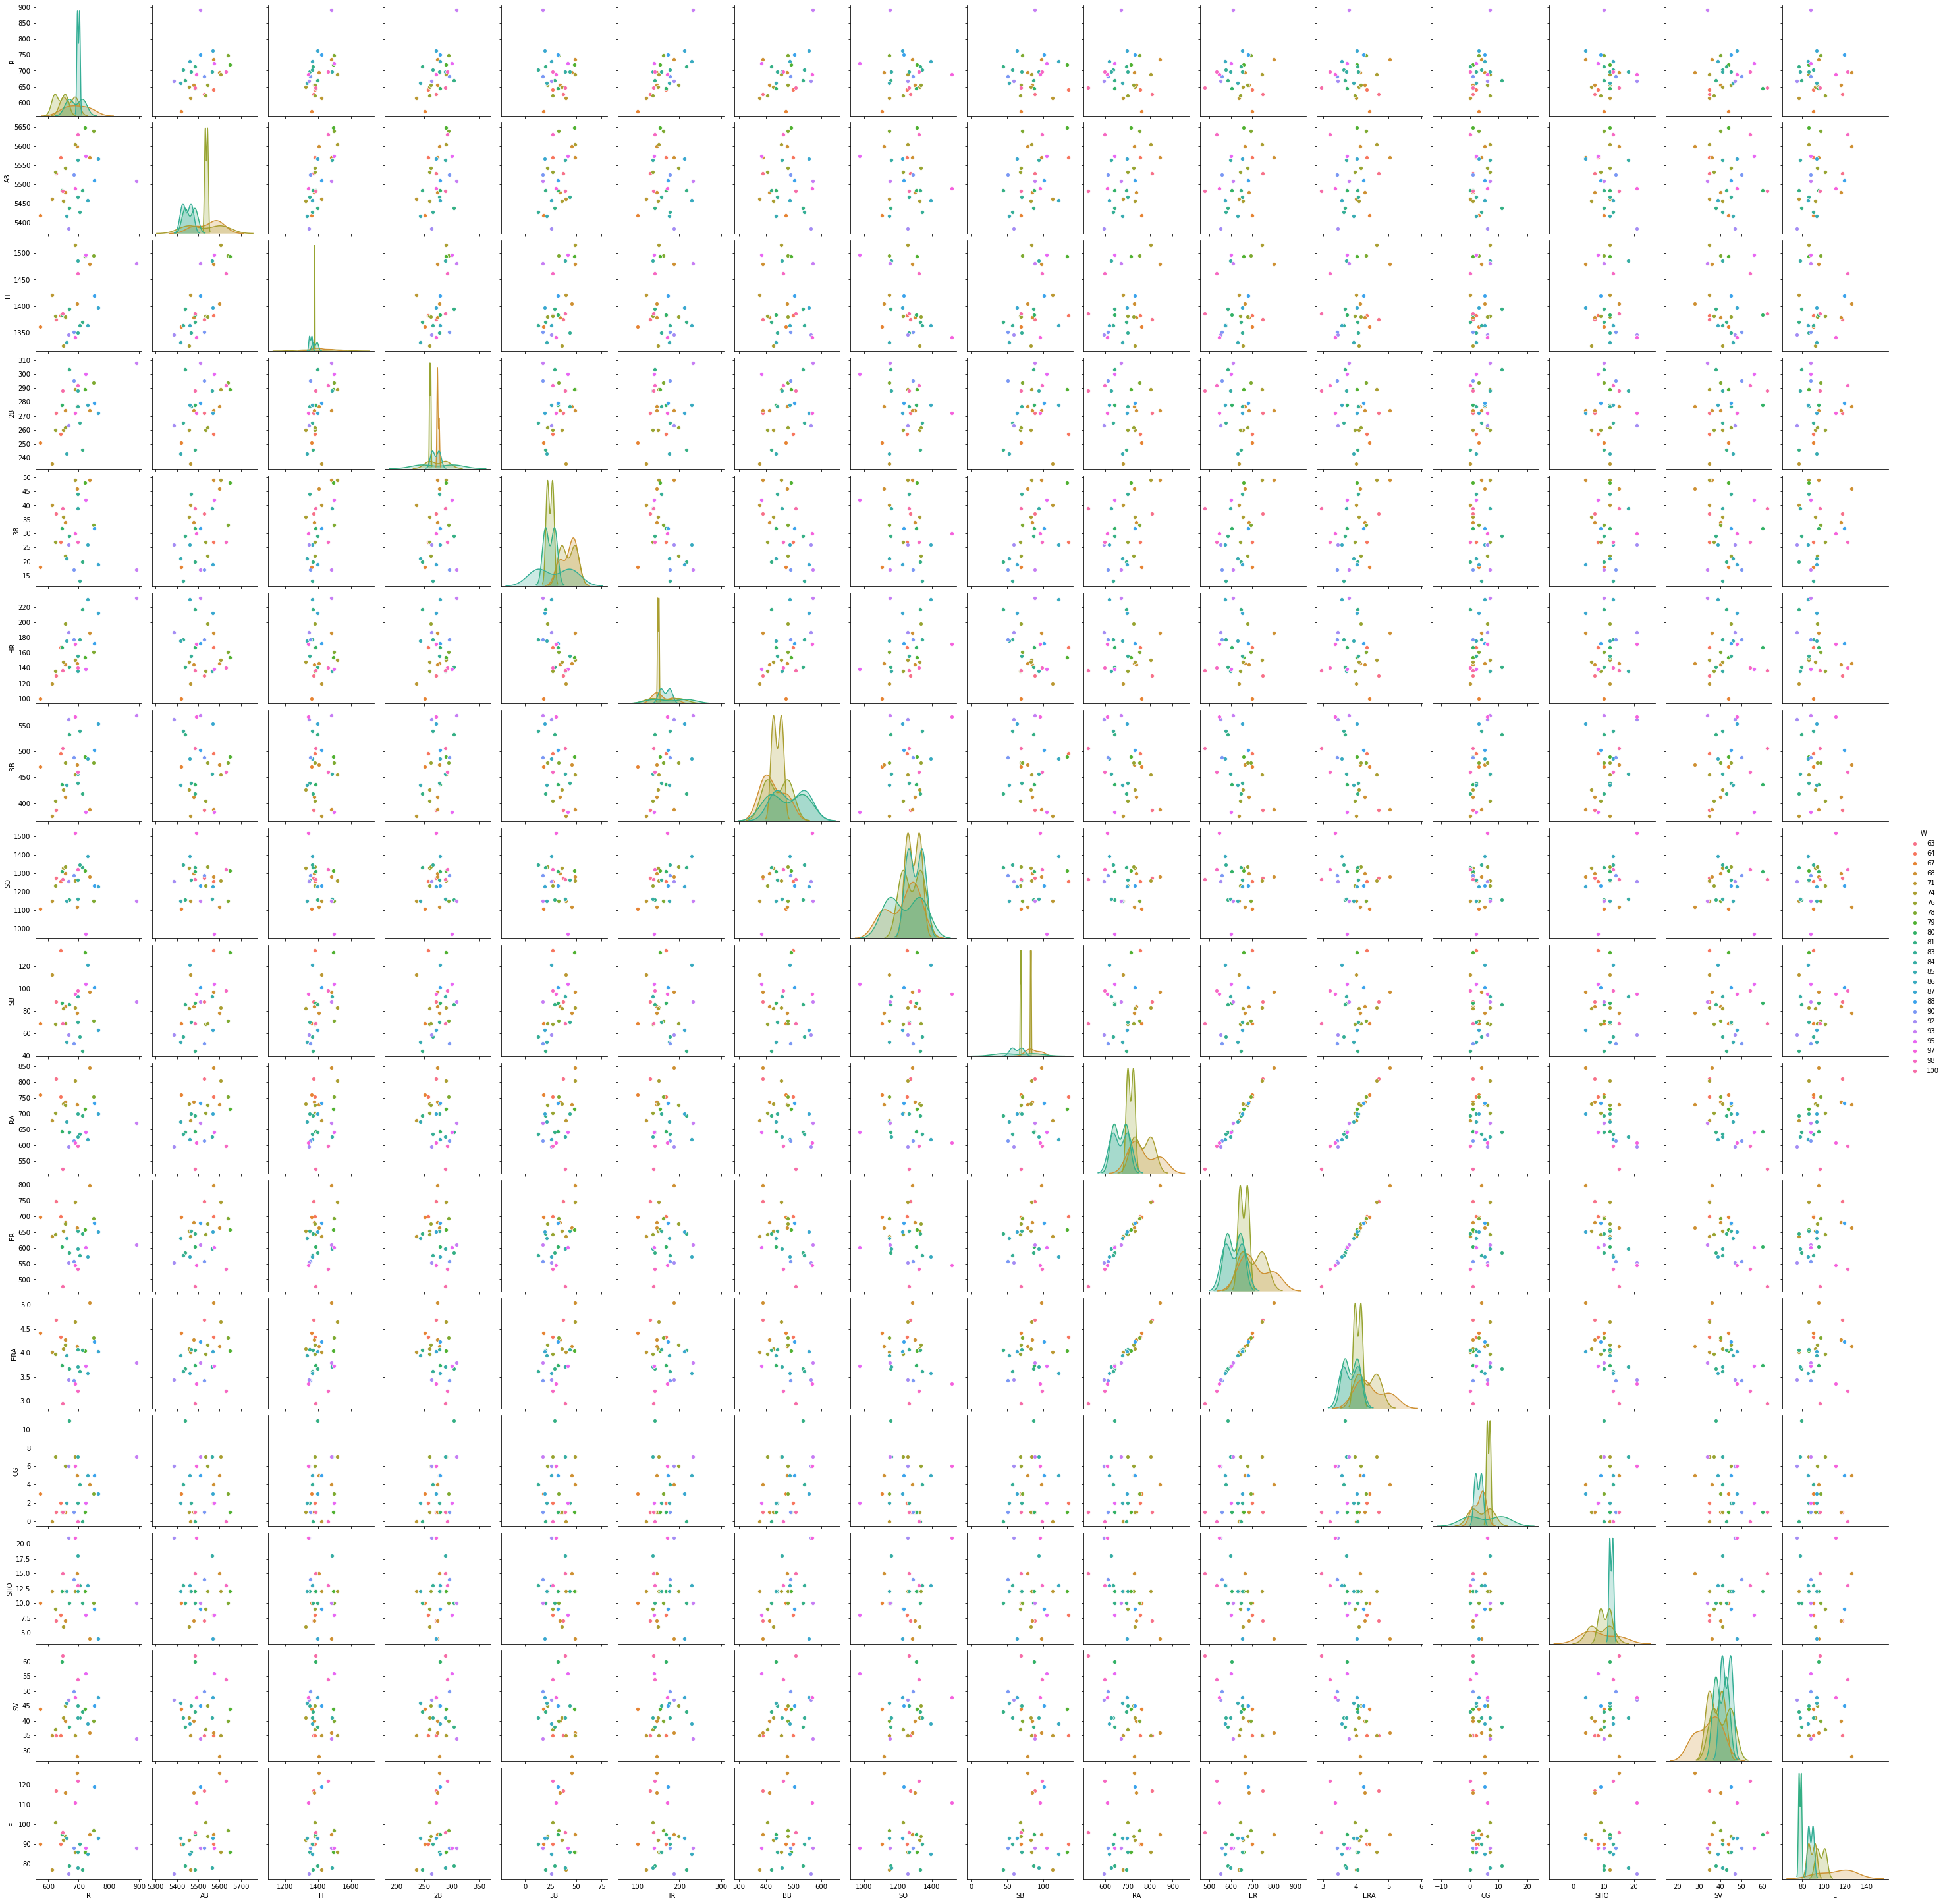

In [12]:
sn.pairplot(df,hue="W")

In [ ]:
#CORREALTION 

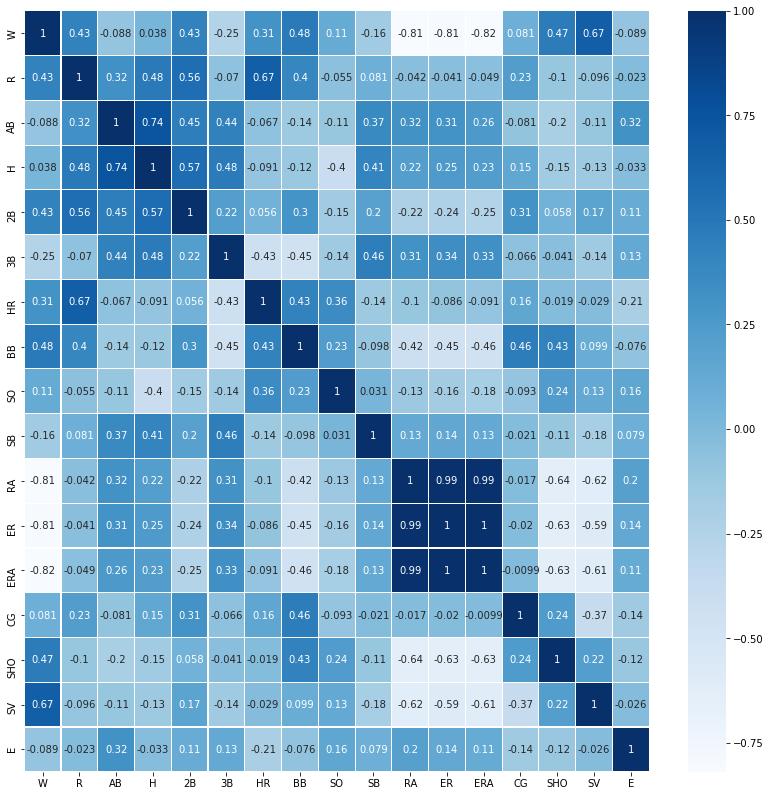

In [13]:
plt.figure(figsize=(14,14))
sn.heatmap(df.corr(),linewidths=.1,cmap="Blues", annot=True)

In [14]:
corr_matrix=df.corr()
corr_matrix["W"].sort_values(ascending = False)

W      1.000000
SV     0.666530
BB     0.484342
SHO    0.471805
R      0.430751
2B     0.427797
HR     0.307407
SO     0.111850
CG     0.080533
H      0.037612
AB    -0.087947
E     -0.089485
SB    -0.157234
3B    -0.251118
ER    -0.809435
RA    -0.812952
ERA   -0.819600
Name: W, dtype: float64

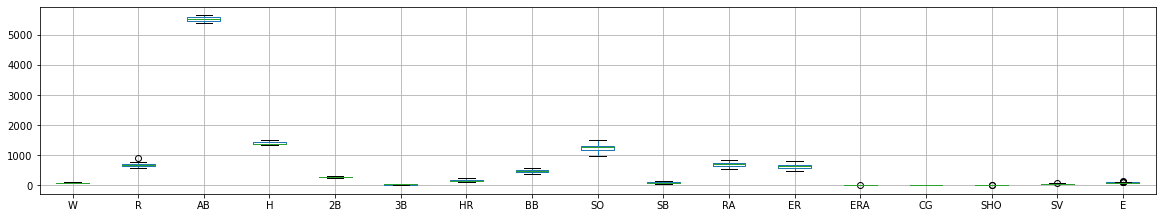

In [15]:
df.boxplot(figsize=(20,20))
plt.subplots_adjust(bottom=0.75)
plt.show()

In [ ]:
#removing outliers

In [16]:
z=np.abs(zscore(df))
z.shape

(30, 17)

In [17]:
threshold=3
print(np.where(z>3))

(array([5]), array([1]))


In [18]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(30, 17)
(29, 17)


In [19]:
loss_percentage=(30-29)/30*100
print(loss_percentage)

3.3333333333333335


In [20]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

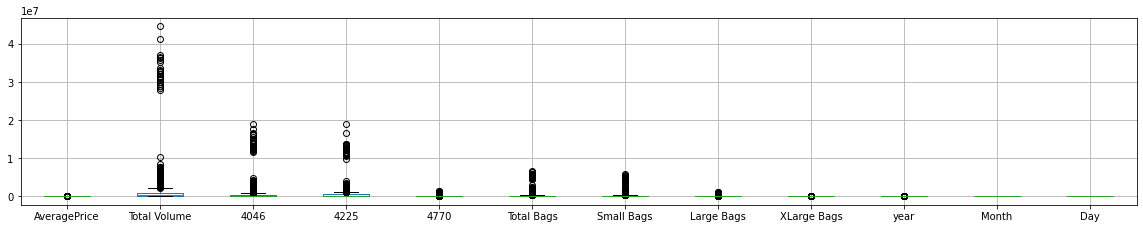

In [298]:
df.boxplot(figsize=(20,20))
plt.subplots_adjust(bottom=0.75)
plt.show()

In [299]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
year            float64
region           object
Month             int64
Day               int64
dtype: object

In [300]:
LE=LabelEncoder()
df["region"]=LE.fit_transform(df["region"]) #converting object to numerical value 

In [301]:
z=np.abs(zscore(df))
z.shape

(1517, 13)

In [162]:
threshold=3
print(np.where(z>3))

(array([ 398,  401,  409,  412,  412,  760, 1016, 1017, 1059, 1182, 1182,
       1182, 1182, 1182, 1182, 1182, 1182, 1183, 1183, 1183, 1183, 1183,
       1183, 1183, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1184, 1185,
       1185, 1185, 1185, 1185, 1185, 1185, 1186, 1186, 1186, 1186, 1186,
       1186, 1186, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1187, 1188,
       1188, 1188, 1188, 1188, 1188, 1188, 1189, 1189, 1189, 1189, 1189,
       1189, 1189, 1189, 1190, 1190, 1190, 1190, 1190, 1190, 1190, 1190,
       1191, 1191, 1191, 1191, 1191, 1191, 1191, 1191, 1192, 1192, 1192,
       1192, 1192, 1192, 1192, 1193, 1193, 1193, 1193, 1193, 1193, 1193,
       1194, 1194, 1194, 1194, 1194, 1194, 1194, 1195, 1195, 1195, 1195,
       1195, 1195, 1195, 1195, 1196, 1196, 1196, 1196, 1196, 1196, 1196,
       1197, 1197, 1197, 1197, 1197, 1197, 1197, 1198, 1198, 1198, 1198,
       1198, 1198, 1198, 1198, 1199, 1199, 1199, 1199, 1199, 1199, 1199,
       1200, 1200, 1200, 1200, 1200, 1200, 1200, 1

In [302]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 13)
(1436, 13)


In [303]:
loss_percentage=(1517-1436)/1517*100
print(loss_percentage)

5.339485827290705


In [ ]:
#Above is an acceptable loss percentage

In [304]:
df.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
Month           0.101439
Day             0.041303
dtype: float64

In [ ]:
#splitting data into target variable 

In [21]:
y=df["W"]
X=df.drop("W",axis=1)

In [ ]:
X

In [23]:
X=pd.DataFrame(power_transform(X,method="yeo-johnson"))
X.skew()

0     0.000000
1     0.000000
2     0.000000
3    -0.035315
4    -0.072933
5    -0.000065
6    -0.007760
7     0.041170
8    -0.010455
9    -0.008082
10   -0.001940
11    0.001746
12   -0.059785
13    0.006560
14    0.000836
15    0.063909
dtype: float64

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=0)

In [25]:
SC=StandardScaler()
X=pd.DataFrame(SC.fit_transform(X),columns=X.columns)

In [33]:
maxr2=0
maxrs=0

for i in range(1,70):
    X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.33,random_state=i)
    mod=DecisionTreeRegressor()
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    r2=r2_score(y_test,pred)
    if r2>maxr2:
        maxr2=r2
        maxrs=i
                                                    
print("Max accuracy is at",r2*100,"at random state",i)

Max accuracy is at 12.893384714193957 at random state 69


In [34]:
def eval(X):
    mod=X
    mod.fit(X_train,y_train)
    pred=mod.predict(X_test)
    print("R2 score is ",r2_score(y_test,pred))
    print("Mean Absolute Error: ", mean_absolute_error(y_test,pred))
    print("Mean Sqaured Error: ", mean_squared_error(y_test,pred))
    print("Root Mean Absolute Error: ", np.sqrt(mean_absolute_error(y_test,pred)))
  

In [35]:
eval(DecisionTreeRegressor())

R2 score is  0.21804752729608212
Mean Absolute Error:  8.6
Mean Sqaured Error:  97.4
Root Mean Absolute Error:  2.932575659723036


In [36]:
eval(LinearRegression())


R2 score is  0.4920368124886886
Mean Absolute Error:  6.4337752490677715
Mean Sqaured Error:  63.271894636408945
Root Mean Absolute Error:  2.536488763836294


In [37]:
eval(AdaBoostRegressor())

R2 score is  0.4514458467501751
Mean Absolute Error:  7.236904761904762
Mean Sqaured Error:  68.3279053287982
Root Mean Absolute Error:  2.690149579838408


In [38]:
eval(GradientBoostingRegressor())

R2 score is  0.49408050876305976
Mean Absolute Error:  7.492321607805849
Mean Sqaured Error:  63.01733182847327
Root Mean Absolute Error:  2.7372105523334973


In [39]:
eval(KNeighborsRegressor())

R2 score is  0.5595054592164419
Mean Absolute Error:  6.379999999999998
Mean Sqaured Error:  54.867999999999995
Root Mean Absolute Error:  2.5258661880630173


In [ ]:
#Parameter tuning for KNeighbors as it has the highest r2 score

In [57]:
parameter ={'n_neighbors': range(1,20)}

In [68]:
neigh = KNeighborsRegressor(n_neighbors=20)
neigh.fit(X_train, y_train) 
result = neigh.predict(X_test)
print(result)

[82.05 82.05 82.05 82.05 82.05 82.05 82.05 82.05 82.05 82.05]


In [70]:
Final_mod=KNeighborsRegressor(n_neighbors =20)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
r2=r2_score(y_test,pred)
print(r2)
print(r2*100)
Final_mod


-0.08479849068721901
-8.4798490687219


KNeighborsRegressor(n_neighbors=20)

In [71]:
import joblib
joblib.dump(Final_mod,"Baseball.pkl")

['Baseball.pkl']